In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical

In [3]:
df = pd.read_csv('../data/final_work_data.csv')

In [4]:
df.head()

,state,county_name,unemployment_rate_2010,population_total_2010,urban_population_prc,rural_population_prc,crime_per_capita,per_capita_sme_num,per_capita_large_num,avg_ann_pay_per_emp_sme,...,popul_college_grad_prc,popul_single_paren_prc,liquor_stores_per10k,police_per_1000,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010
0,AL,Autauga,8.8,54571.0,0.579978,0.420022,0.002620,0.012259,0.002565,22667.03037,...,21.0,9.0,0.4,1.172784,77.25,17.58,0.86,0.40,2.40,1.59
1,AL,Baldwin,9.9,182265.0,0.577209,0.422791,0.002112,0.020108,0.002019,28664.84962,...,26.0,9.0,0.8,1.486846,83.50,9.31,0.74,0.63,4.38,1.49
2,AL,Bibb,11.2,22915.0,0.316474,0.683526,0.002575,0.011172,0.000916,27318.29733,...,11.0,5.0,0.5,0.523674,75.02,21.92,0.10,0.28,1.77,0.89
3,AL,Blount,9.7,57322.0,0.100485,0.899515,0.000419,0.010485,0.001082,26050.59382,...,12.0,7.0,0.0,0.854820,88.89,1.26,0.20,0.50,8.07,1.19
4,AL,Butler,13.4,20947.0,0.287678,0.712322,0.003151,0.015563,0.003580,27202.56233,...,12.0,10.0,0.5,0.572874,54.06,43.19,0.83,0.28,0.91,0.77


In [5]:
cols = list(df.groupby('state').mean('unemployment_rate_2010').sort_values('unemployment_rate_2010', ascending=True).index)

In [6]:
wid = df.groupby('state').mean('unemployment_rate_2010').sort_values('unemployment_rate_2010', ascending=True)['unemployment_rate_2010']

<BarContainer object of 43 artists>

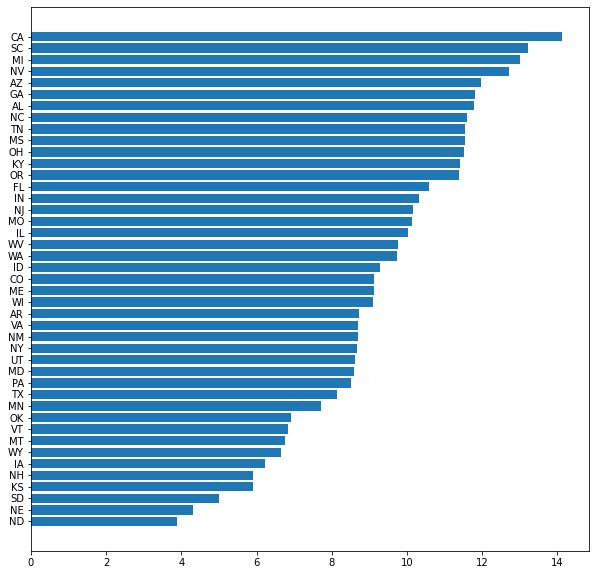

In [7]:
plt.figure(figsize=(10, 10))
plt.barh(cols, width=wid)

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr()[['unemployment_rate_2010']], cmap = 'coolwarm', vmin=-1, vmax=1, annot=True)

NameError: name 'sns' is not defined

<Figure size 720x720 with 0 Axes>

In [13]:
df.head(1)

,state,county_name,unemployment_rate_2010,population_total_2010,urban_population_prc,rural_population_prc,crime_per_capita,per_capita_sme_num,per_capita_large_num,avg_ann_pay_per_emp_sme,...,popul_college_grad_prc,popul_single_paren_prc,liquor_stores_per10k,police_per_1000,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010
0,AL,Autauga,8.8,54571.0,0.579978,0.420022,0.00262,0.012259,0.002565,22667.03037,...,21.0,9.0,0.4,1.172784,77.25,17.58,0.86,0.4,2.4,1.59


In [11]:
X = df.drop('state', 'county_name', 'unemployment_rate_2010')
y = df[['unemployment_rate_2010']]

KeyError: "[('state', 'county_name', 'unemployment_rate_2010')] not found in axis"